In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/New dataset
%cd car-resale/

/content/gdrive/MyDrive/New dataset
/content/gdrive/MyDrive/New dataset/car-resale


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
%cd /content/gdrive/MyDrive/New dataset
%cd car-resale/

/content/gdrive/MyDrive/New dataset
/content/gdrive/MyDrive/New dataset/car-resale


In [ ]:
dataSet = pd.read_csv('Car details v3.csv')


In [ ]:
dataSet.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
dataSet.dropna()
dataSet.shape

(8128, 13)

In [ ]:
dataSet['year']= 2023-dataSet['year']

In [ ]:
dataSet.fillna('n/a', inplace=True)

In [ ]:
# Upper percentile and lower percentile based on price cars
price_1 = dataSet['selling_price'].quantile(0.99) # Upper
price_2 = dataSet['selling_price'].quantile(0.1)  # Lower 
print(price_1)
print(price_2)

# Upper and lower percentile based on odometer
odometer_1 = dataSet['km_driven'].quantile(0.99) # Upper
odometer_2 = dataSet['km_driven'].quantile(0.1)  # Lower
print(odometer_1)
print(odometer_2)

5200000.0
150000.0
225000.0
15000.0


In [ ]:
# Take a range based on upper and lower percentile price and odometer cars
dataSet = dataSet[(dataSet['selling_price'] < price_1) & (dataSet['selling_price'] > price_2)]
data = dataSet[(dataSet['km_driven'] < odometer_1) & (dataSet['km_driven'] > odometer_2)]

In [ ]:
dataSet['first_word'] = dataSet['name'].str.split().str.get(0)

In [ ]:
 X= dataSet.drop(columns=["selling_price","transmission","first_word","km_driven"])
 y= dataSet[['selling_price']]

In [ ]:
X = pd.get_dummies(X)
X.shape

(7185, 3072)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25) #splitting the data into train and test

In [ ]:
params={
    "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
    "gamma": [0.0,0.1,9.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
model = XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
# L1 regularization
model_l1 = XGBRegressor(alpha=0.5, objective='reg:squarederror')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

# L2 regularization
model_l2 = XGBRegressor(reg_lambda=0.5, objective='reg:squarederror')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

# Evaluate the performance of the models
print('MAE with L1 regularization:', mean_absolute_error(y_test, y_pred_l1))
print('MSE with L1 regularization:', mean_squared_error(y_test, y_pred_l1))
print('R2 with L1 regularization:', r2_score(y_test, y_pred_l1))

print('MAE with L2 regularization:', mean_absolute_error(y_test, y_pred_l2))
print('MSE with L2 regularization:', mean_squared_error(y_test, y_pred_l2))
print('R2 with L2 regularization:', r2_score(y_test, y_pred_l2))


In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[14:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 9.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Test model
y_pred = random_search.predict(X_test)



# Evaluate the performance of the model
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MAE: 106251.09988000835
MSE: 36220756324.232376
R2: 0.9217007476487102


dsfafsafsfaf


```

-----------------------------------------------------------------------------




In [ ]:
# Handle missing values
df = df[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']]

df = df.dropna()



In [ ]:
df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['engine_num'] = df['engine'].str.split(' ').str[0].astype(float)

# Encode categorical variables
df_encoded = pd.get_dummies(df[['name', 'fuel', 'seller_type', 'transmission', 'owner']])
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)


In [ ]:
scaler = StandardScaler()
df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']] = scaler.fit_transform(df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']])

# Split the data into training and testing sets
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: ignored

this is non sense after this 


In [ ]:
data= pd.read_csv("vehicles.csv",usecols=["year","manufacturer","model","condition","cylinders","fuel","odometer","title_status","transmission","drive","size","type","paint_color","price"])

In [ ]:
data.dropna()
data.isna().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [ ]:
data['year'] = 2022 - data['year']
data = data.dropna(subset=['year', 'odometer'])
data.fillna('n/a', inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421344 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         421344 non-null  int64  
 1   year          421344 non-null  float64
 2   manufacturer  421344 non-null  object 
 3   model         421344 non-null  object 
 4   condition     421344 non-null  object 
 5   cylinders     421344 non-null  object 
 6   fuel          421344 non-null  object 
 7   odometer      421344 non-null  float64
 8   title_status  421344 non-null  object 
 9   transmission  421344 non-null  object 
 10  drive         421344 non-null  object 
 11  size          421344 non-null  object 
 12  type          421344 non-null  object 
 13  paint_color   421344 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 48.2+ MB


In [ ]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [ ]:
data['condition'].value_counts()

n/a          170493
good         121235
excellent     99765
like new      21178
fair           6769
new            1303
salvage         601
Name: condition, dtype: int64

In [ ]:
# Identifying type cars of the dataset
data['type'].value_counts()

n/a            91782
sedan          85760
SUV            76066
pickup         42686
truck          35231
other          21698
coupe          18986
hatchback      16505
wagon          10649
van             8423
convertible     7659
mini-van        4773
offroad          609
bus              517
Name: type, dtype: int64

In [ ]:
# Identifying colors of cars 
data['paint_color'].value_counts()

n/a       128090
white      78268
black      62017
silver     42481
blue       30925
red        30163
grey       24086
green       7295
custom      6699
brown       6553
yellow      2119
orange      1970
purple       678
Name: paint_color, dtype: int64

In [ ]:
# Identifying manufacturer cars 
mf = data['manufacturer'].value_counts()
data['manufacturer'] = data['manufacturer'].apply(lambda x: x if str(x) in mf[:10] else 'others')
# Numerical data cleaning

data.describe()

,price,year,odometer
count,4.213440e+05,421344.000000,4.213440e+05
mean,7.598356e+04,10.774756,9.822513e+04
std,1.226205e+07,9.463345,2.141207e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,5.975000e+03,5.000000,3.795100e+04
50%,1.398800e+04,9.000000,8.582750e+04
75%,2.649500e+04,14.000000,1.338000e+05
max,3.736929e+09,122.000000,1.000000e+07


In [ ]:
# Upper percentile and lower percentile based on price cars
price_1 = data['price'].quantile(0.99) # Upper
price_2 = data['price'].quantile(0.1)  # Lower 
print(price_1)
print(price_2)

66858.5500000001
700.0


In [ ]:
# Upper and lower percentile based on odometer
odometer_1 = data['odometer'].quantile(0.99) # Upper
odometer_2 = data['odometer'].quantile(0.1)  # Lower
print(odometer_1)
print(odometer_2)

280000.0
15041.200000000012


In [ ]:
# Take a range based on upper and lower percentile price and odometer cars
data = data[(data['price'] < price_1) & (data['price'] > price_2)]
data = data[(data['odometer'] < odometer_1) & (data['odometer'] > odometer_2)]
# Check new dataset describe
data.describe()

,price,year,odometer
count,335782.000000,335782.000000,335782.000000
mean,17642.410344,11.209609,101023.551456
std,12622.815581,8.472664,57050.089312
min,702.000000,0.000000,15044.000000
25%,7499.000000,6.000000,52326.000000
50%,14700.000000,9.000000,96603.000000
75%,25590.000000,14.000000,140141.750000
max,66800.000000,122.000000,279974.000000


In [ ]:
data.shape

(335782, 14)

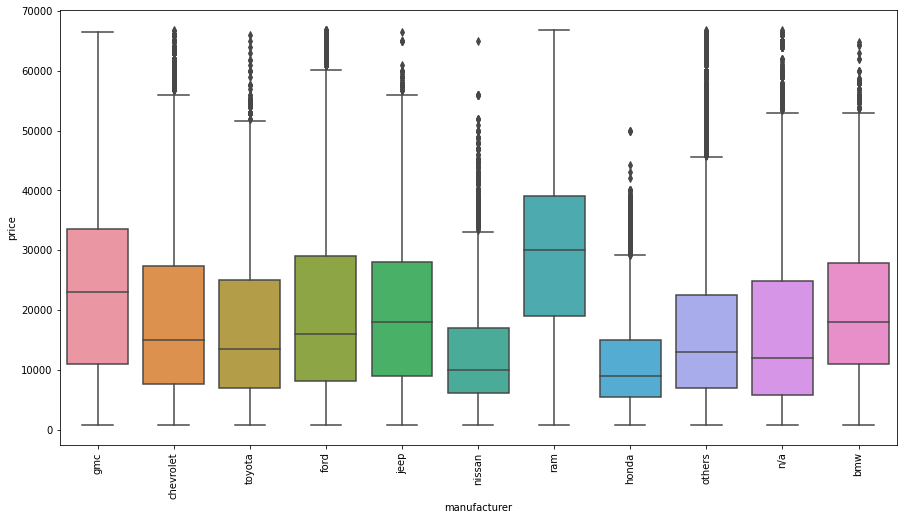

In [ ]:
# Visualization price vs manufacturer cars
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()


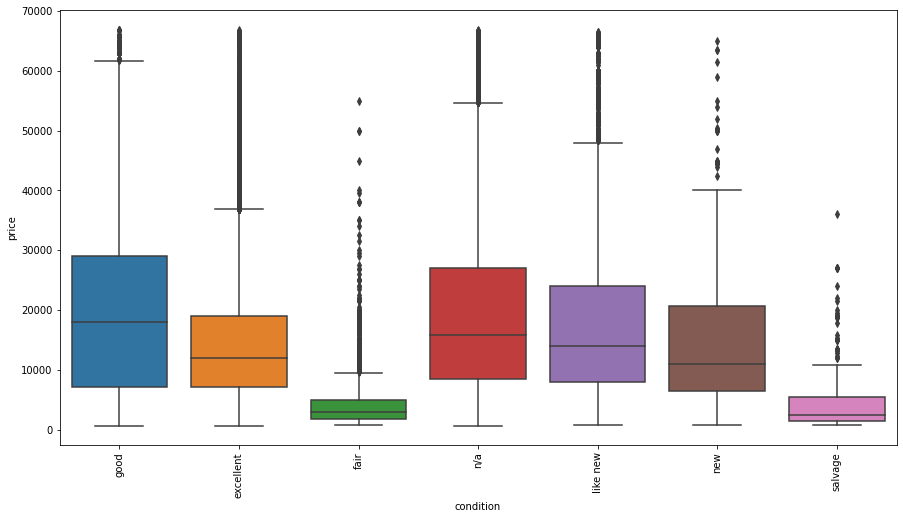

In [ ]:
# Visualization price vs condition cars
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='condition', y='price')
plt.xticks(rotation=90)
plt.show()

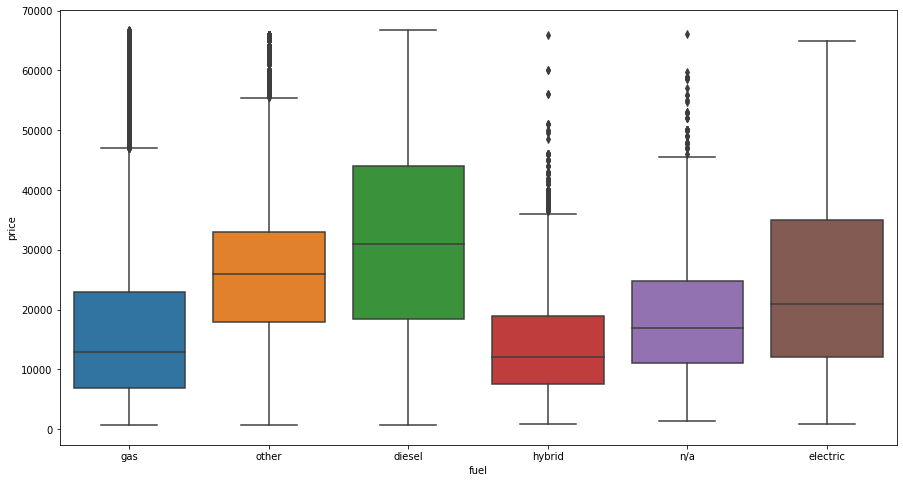

In [ ]:
# Visualization price vs fuel cars
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='fuel', y='price')
plt.show()

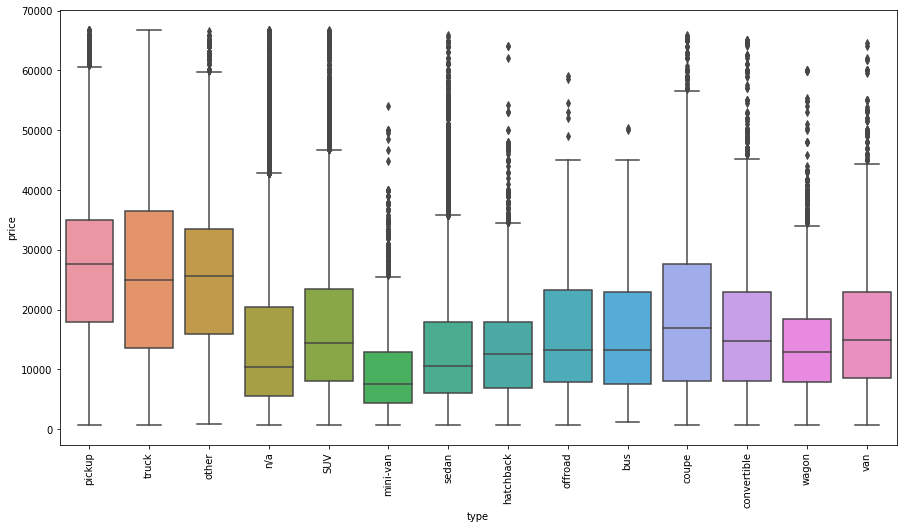

In [ ]:
# Visualization price vs type cars
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='type', y='price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = data.drop(columns=['price','model']) #splitting to feautures and label
y = data[['price']] 
X = pd.get_dummies(X)
X.shape

(335782, 82)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25)

In [ ]:

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_train, y_train),lm.score(X_test, y_test)

(0.6371109936342856, 0.6412212974052476)

In [ ]:
mf = data['manufacturer'].value_counts()
mf

others       109885
ford          55707
chevrolet     42748
toyota        28011
honda         17791
nissan        15445
jeep          14949
ram           14102
gmc           13629
bmw           12407
n/a           11108
Name: manufacturer, dtype: int64

In [ ]:
data.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [ ]:
md = data['model'].value_counts()
md

f-150                        6449
silverado 1500               4047
1500                         3460
n/a                          3411
camry                        2579
                             ... 
International shuttle bus       1
sportgage                       1
Toyta xamry                     1
g35xsports                      1
96 Suburban                     1
Name: model, Length: 24112, dtype: int64

In [ ]:
p1 = data['price'].quantile(0.99)
p2 = data['price'].quantile(0.1)
print(p1, p2)

55410.0 4200.0


In [ ]:
data = data[(data['price']<p1) & (data['price']>p2)]
o1 = data['odometer'].quantile(0.99)
o2 = data['odometer'].quantile(0.05)
print(o1, o2)

data = data[(data['odometer']<o1) & (data['odometer']>o2)]
data.describe()

237583.0 21570.0


,price,year,odometer
count,280700.000000,280700.000000,280700.000000
mean,18327.706288,10.628689,97504.921535
std,11309.851322,8.023101,50175.867548
min,4219.000000,0.000000,21572.000000
25%,8990.000000,6.000000,55000.000000
50%,15500.000000,9.000000,93700.000000
75%,25777.000000,13.000000,132840.500000
max,55382.000000,106.000000,237574.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
data.columns

X_num = data[['odometer', 'year']]
X_cat = data.drop(['odometer', 'year', 'price'], axis=1)
for i in X_cat.columns:
  le = LabelEncoder()
  X_cat[i] = le.fit_transform(X_cat[i])
X_cat.head()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
27,3,16922,2,6,2,0,3,2,3,9,11
28,1,17186,2,6,2,0,3,2,3,9,1
30,10,19485,2,6,2,0,3,2,3,9,9
31,2,9763,0,5,2,0,0,3,1,11,0
32,3,17019,2,6,2,0,3,0,3,9,0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = data['price']

In [ ]:
X.head()

,odometer,year,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
27,-0.788865,-0.327641,3,16922,2,6,2,0,3,2,3,9,11
28,-0.523677,0.170921,1,17186,2,6,2,0,3,2,3,9,1
30,-1.123668,-0.701562,10,19485,2,6,2,0,3,2,3,9,9
31,0.607765,-0.203000,2,9763,0,5,2,0,0,3,1,11,0
32,-0.574160,-0.078360,3,17019,2,6,2,0,3,0,3,9,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model_lgb = lgb.LGBMRegressor()
param={
    'num_leaves':[32,64],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[50, 100]
}

In [ ]:
GS_LGB = GridSearchCV(model_lgb, param, cv=10, n_jobs=n_thread)
GS_LGB.fit(X_train, y_train)

NameError: ignored